In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("labelled_data_whole.csv")

In [3]:
df['Month'] = pd.to_datetime(df['timestamp']).dt.to_period('M') # extract month
df['Toxic'] = df['predicted_label'].apply(lambda x: 1 if x == 'toxic' else 0) # mark toxic comments as 1
df['Month'] = df['Month'].dt.to_timestamp()

In [7]:
df_bymonth = df.groupby(['Month'])['Toxic'].mean().reset_index() # group by month, calculate proportion of toxic comments
df_bymonth

,Month,Toxic
0,2020-01-01,0.231935
1,2020-02-01,0.212599
2,2020-03-01,0.204609
3,2020-04-01,0.228695
4,2020-05-01,0.230436
5,2020-06-01,0.227406
6,2020-07-01,0.208985
7,2020-08-01,0.213221
8,2020-09-01,0.216835
9,2020-10-01,0.220265


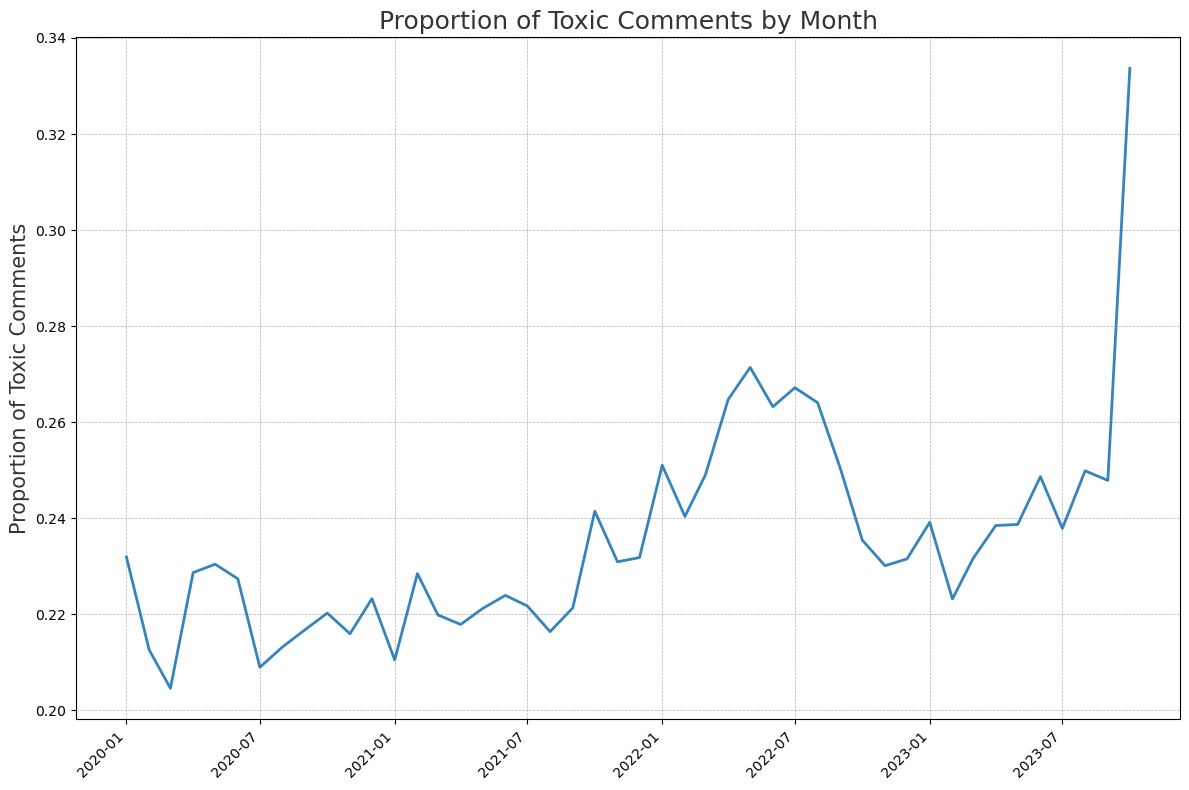

In [5]:
# plot monthly proportion of toxic comments from 2020 to 2023 (general trend)
plt.figure(figsize=(12, 8))

plt.plot(df_bymonth['Month'], df_bymonth['Toxic'], linewidth=2, alpha=0.9)

# Title and labels with larger font size
plt.title("Proportion of Toxic Comments by Month", fontsize=18, color="#333333")
plt.ylabel("Proportion of Toxic Comments", fontsize=15, color="#333333")

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add grid lines for better visual structure
plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()

In [8]:
df['Hour'] = pd.to_datetime(df['timestamp']).dt.hour # extract hour
df_byhour = df.groupby(['Hour'])['Toxic'].mean().reset_index() # group by hour, calculate proportion of toxic comments
df_byhour

,Hour,Toxic
0,0,0.226004
1,1,0.221005
2,2,0.222965
3,3,0.226476
4,4,0.228498
5,5,0.228171
6,6,0.230255
7,7,0.232620
8,8,0.231439
9,9,0.229123


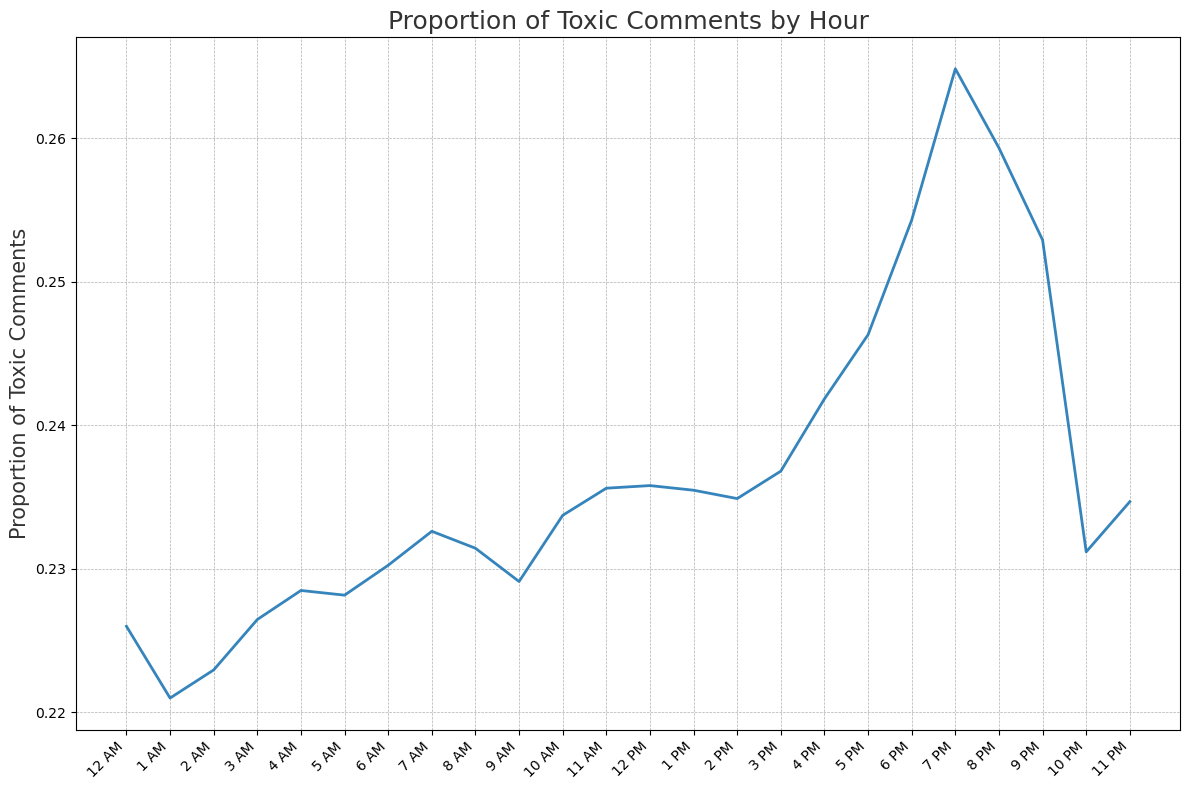

In [10]:
# plot proportion of toxic comments by hour from 2020 to 2023
plt.figure(figsize=(12, 8))

plt.plot(df_byhour['Hour'], df_byhour['Toxic'], linewidth=2, alpha=0.9)

# Title and labels with larger font size
plt.title("Proportion of Toxic Comments by Hour", fontsize=18, color="#333333")
plt.ylabel("Proportion of Toxic Comments", fontsize=15, color="#333333")

# Define custom x-axis labels for 0-23 as 12 AM, 1 AM, ..., 11 PM
hours = ['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM',
         '8 AM', '9 AM', '10 AM', '11 AM',
         '12 PM', '1 PM', '2 PM', '3 PM', '4 PM', '5 PM', '6 PM', '7 PM',
         '8 PM', '9 PM', '10 PM', '11 PM']

plt.xticks(ticks=range(24), labels=hours, rotation=45, ha='right')  # Custom ticks

# Add grid lines for better visual structure
plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()
